# Optimize Portfolio Based on Forecast
We will use the forecasted data from Task 3 to optimize a sample investment portfolio consisting of three assets: 
- Tesla (TSLA)
- Vanguard Total Bond Market ETF (BND) 
- S&P 500 ETF (SPY). 

The goal is to adjust the portfolio weights to maximize returns while minimizing risks based on the predicted market trends.

In [11]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [12]:
from scripts.fetchPrepr_close_column import *
from scripts.portfolio_metrics import *
from scripts.optimize_analyze_portfolio import *
from scripts.visualize_portfolio import *
from scripts.lstm_model import *
from scripts.forecasting import *
from scripts.clean_data import *
from scripts.compute_and_forecast import *

In [18]:
# Fetch historical data
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

data = fetch_data(tickers, start_date, end_date)

[*********************100%***********************]  3 of 3 completed


In [4]:
data['Close']

Ticker,BND,SPY,TSLA
Date,,,
2015-01-02,62.387074,172.592834,14.620667
2015-01-05,62.568214,169.475952,14.006000
2015-01-06,62.749401,167.879623,14.085333
2015-01-07,62.787140,169.971619,14.063333
2015-01-08,62.688995,172.987778,14.041333
...,...,...,...
2025-01-24,71.592491,607.969971,406.579987
2025-01-27,71.970123,599.369995,397.149994
2025-01-28,71.930367,604.520020,398.089996


In [5]:
tsla_data = fetch_data('TSLA', '2015-01-01', '2025-01-31')
train_data, test_data = preprocess_data(tsla_data)

# Load the trained LSTM model
lstm_model = load_lstm_model('lstm_model.keras')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Prepare the last sequence for forecasting
lookback = 60
last_sequence = train_data[-lookback:].values.reshape(-1, 1)

# Generate forecasts
forecast_valuesL = lstm_forecast(lstm_model, last_sequence, steps=12, lookback=lookback, scaler_filename='scaler.pkl')

# Use forecast_valuesL as the TSLA forecast
tsla_forecast = forecast_valuesL

[*********************100%***********************]  1 of 1 completed


LSTM model loaded from lstm_model.keras


In [6]:
# Create combined DataFrame
combined_data = create_combined_dataframe(tsla_forecast, data['Close']['BND'], data['Close']['SPY'])
combined_data

,TSLA,BND,SPY
Date,,,
2025-01-14,1853.926758,70.777580,582.190002
2025-01-15,1810.617676,71.344040,592.780029
2025-01-16,1809.571533,71.483162,591.640015
2025-01-17,1816.430176,71.503044,597.580017
2025-01-21,1818.238892,71.711739,603.049988
2025-01-22,1814.513550,71.562668,606.440002
2025-01-23,1805.337280,71.453354,609.750000
2025-01-24,1781.977051,71.592491,607.969971
2025-01-27,1728.366943,71.970123,599.369995


In [7]:
# Compute annual returns and covariance matrix
annual_returns, covariance_matrix = compute_annual_returns_and_covariance(combined_data)
print(annual_returns)
print(covariance_matrix)

TSLA   -5.745684
BND     0.390446
SPY     0.892348
dtype: float64
          TSLA       BND       SPY
TSLA  0.179422 -0.000002  0.010659
BND  -0.000002  0.002289  0.000399
SPY   0.010659  0.000399  0.019504


In [8]:
# Optimize portfolio weights
optimized_weights, max_sharpe_ratio = optimize_portfolio(annual_returns, covariance_matrix)
print(optimized_weights)
print(max_sharpe_ratio)

[5.37259979e-12 7.88096966e-01 2.11903747e-01]
9.67106912495702


In [9]:
# Analyze portfolio risk and return
portfolio_metrics = analyze_portfolio(combined_data,optimized_weights, annual_returns, covariance_matrix)
portfolio_metrics

{'Return': 0.4968014294129373,
 'Volatility': 0.04930183242952017,
 'VaR (95%)': -0.09162535806752911,
 'Sharpe Ratio': 9.67106912495702}

In [13]:
# Print results
print("Optimized Portfolio Weights:")
print(f"TSLA: {optimized_weights[0]:.2%}")
print(f"BND: {optimized_weights[1]:.2%}")
print(f"SPY: {optimized_weights[2]:.2%}")
print("\nPortfolio Metrics:")
print(f"Return: {portfolio_metrics['Return']:.2%}")
print(f"Volatility: {portfolio_metrics['Volatility']:.2%}")
print(f"VaR (95%): {portfolio_metrics['VaR (95%)']:.2f}%")
print(f"Sharpe Ratio: {portfolio_metrics['Sharpe Ratio']:.2f}")

Optimized Portfolio Weights:
TSLA: 0.00%
BND: 78.81%
SPY: 21.19%

Portfolio Metrics:
Return: 49.68%
Volatility: 4.93%
VaR (95%): -0.09%
Sharpe Ratio: 9.67


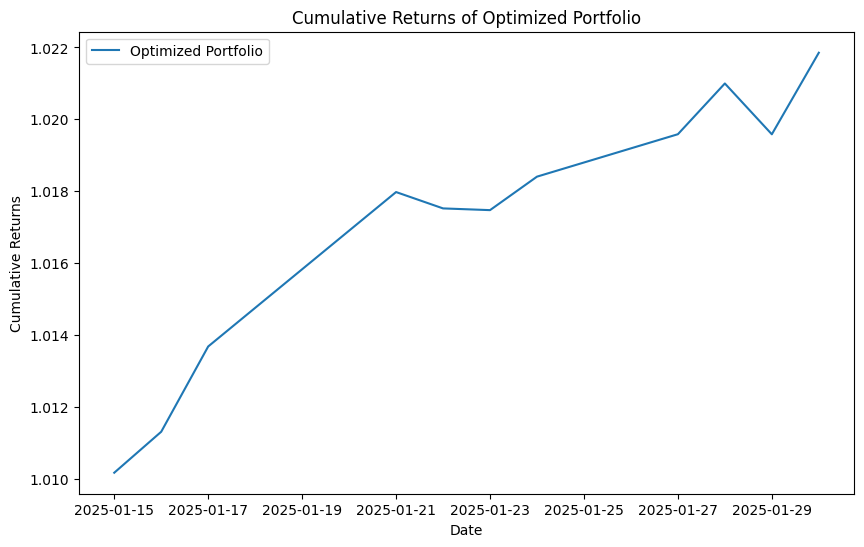

In [14]:
# Visualize portfolio performance
plot_portfolio_performance(combined_data, optimized_weights)

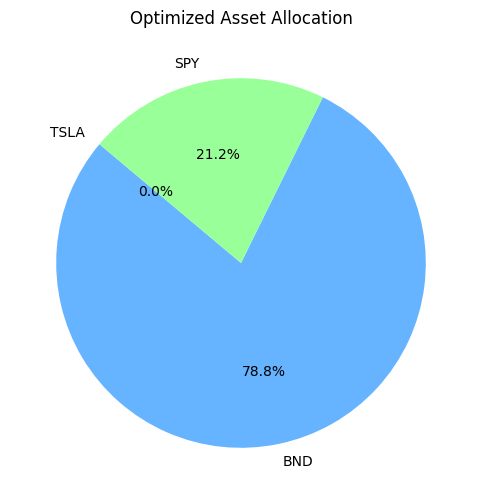

In [15]:
# Asset Allocation Pie Chart
plot_asset_allocation(optimized_weights, ['TSLA', 'BND', 'SPY'])

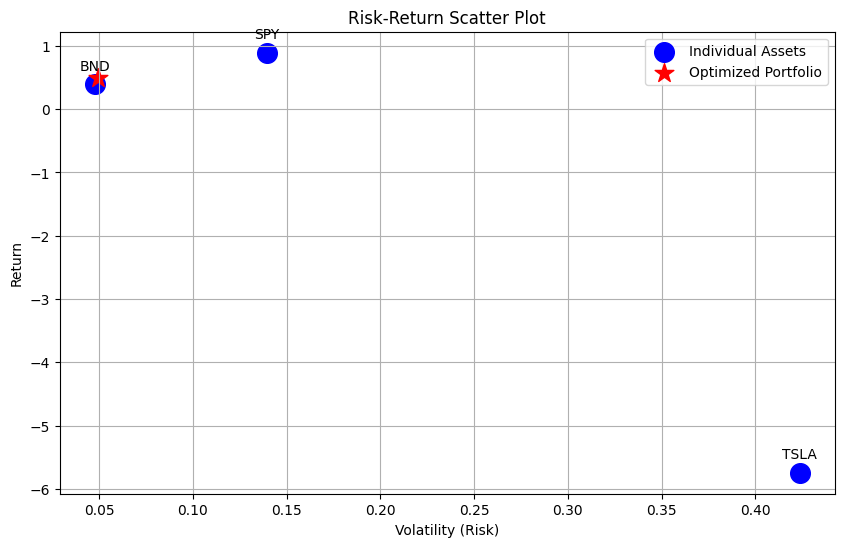

In [10]:
# Risk-Return Scatter Plot
plot_risk_return(annual_returns, covariance_matrix, optimized_weights)

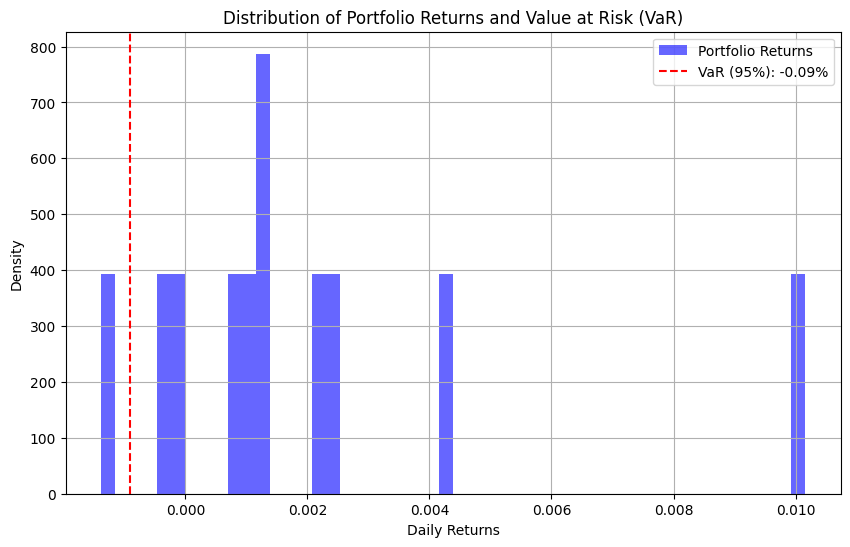

In [18]:
# Value at Risk (VaR) Distribution
plot_var_distribution(combined_data, optimized_weights)

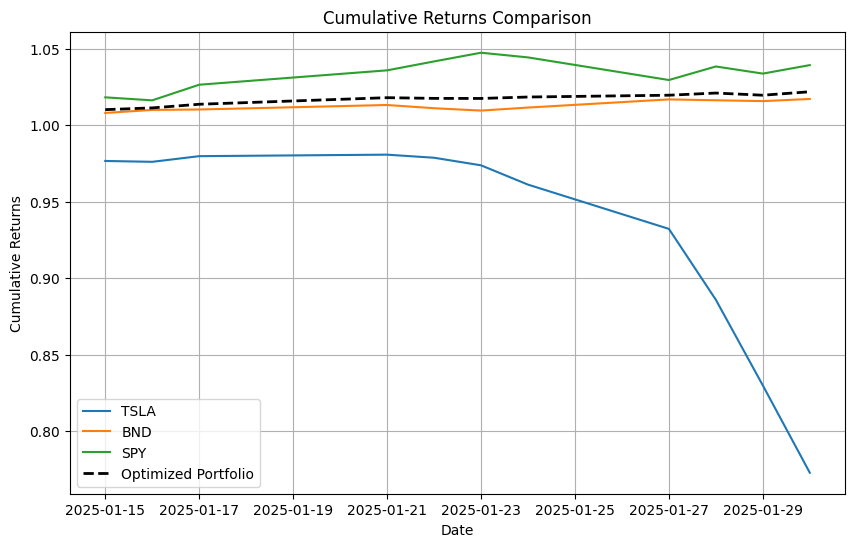

In [19]:
# Cumulative Returns Comparison
plot_cumulative_returns_comparison(combined_data, optimized_weights)